# Sentiment Analysis with Deep Learning using BERT

### Project Outline

**Task 1**: Introduction

**Task 2**: Exploratory Data Analysis and Preprocessing

**Task 3**: Training/Validation Split

**Task 4**: Loading Tokenizer and Encoding our Data

**Task 5**: Setting up BERT Pretrained Model

**Task 6**: Creating Data Loaders

**Task 7**: Setting Up Optimizer and Scheduler

**Task 8**: Defining our Performance Metrics

**Task 9**: Creating our Training Loop

**Task 10**: Loading and Evaluating our Model

## Task 1: Introduction

### What is BERT

BERT is a large-scale transformer-based Language Model that can be finetuned for a variety of tasks.

For more information, the original paper can be found [here](https://arxiv.org/abs/1810.04805).

[HuggingFace documentation](https://huggingface.co/transformers/model_doc/bert.html)

[Bert documentation](https://characters.fandom.com/wiki/Bert_(Sesame_Street)

[SMILE Twitter dataset](https://doi.org/10.6084/m9.figshare.3187909.v2_)


## Task 2: Exploratory Data Analysis and Preprocessing

In [ ]:
!pip install pandas torch transformers scikit-learn


In [ ]:
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
# Load the dataset
df = pd.read_csv('/content/smile-annotations-final.csv',
                 names=['id', 'text', 'category'],
                 engine='python')
df.set_index('id', inplace=True)

# Inspect the dataset
print(df.head())


                                                                 text category
id                                                                            
611857364396965889  @aandraous @britishmuseum @AndrewsAntonio Merc...   nocode
614484565059596288  Dorian Gray with Rainbow Scarf #LoveWins (from...    happy
614746522043973632  @SelectShowcase @Tate_StIves ... Replace with ...    happy
614877582664835073  @Sofabsports thank you for following me back. ...    happy
611932373039644672  @britishmuseum @TudorHistory What a beautiful ...    happy


In [ ]:
df.text.iloc[0]

'@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap'

In [ ]:
df.category.value_counts()

,count
category,
nocode,1572
happy,1137
not-relevant,214
angry,57
surprise,35
sad,32
happy|surprise,11
happy|sad,9
disgust|angry,7


In [ ]:
df=df[~df.category.str.contains('\|')]

In [ ]:
df=df[df.category != 'nocode']

In [ ]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df['category'].value_counts())

category
happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: count, dtype: int64


In [ ]:
possible_labels = df.category.unique()

In [ ]:
label_dict={}
for index, possible_labels in enumerate(possible_labels):
  label_dict[possible_labels] = index

In [ ]:
label_dict

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [ ]:
df['label']=df.category.replace(label_dict)

In [ ]:
df.head(10)

,text,category,label
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0
2,@Sofabsports thank you for following me back. ...,happy,0
3,@britishmuseum @TudorHistory What a beautiful ...,happy,0
4,@NationalGallery @ThePoldarkian I have always ...,happy,0
5,Lucky @FitzMuseum_UK! Good luck @MirandaStearn...,happy,0
6,Yr 9 art students are off to the @britishmuseu...,happy,0
7,@RAMMuseum Please vote for us as @sainsbury #s...,not-relevant,1
8,#AskTheGallery Have you got plans to privatise...,not-relevant,1
9,@BarbyWT @britishmuseum so beautiful,happy,0


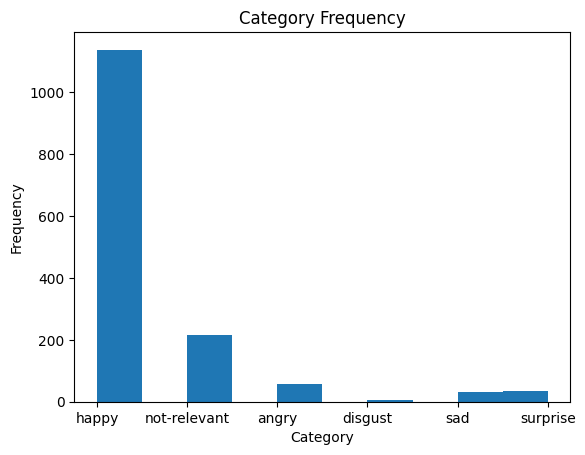

In [ ]:
#  Category Frequency

import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['category'])
plt.xlabel('Category')
plt.ylabel('Frequency')
_ = plt.title('Category Frequency')

<ipython-input-16-311f77a7ef57>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='label', y='category', inner='box', palette='Dark2')


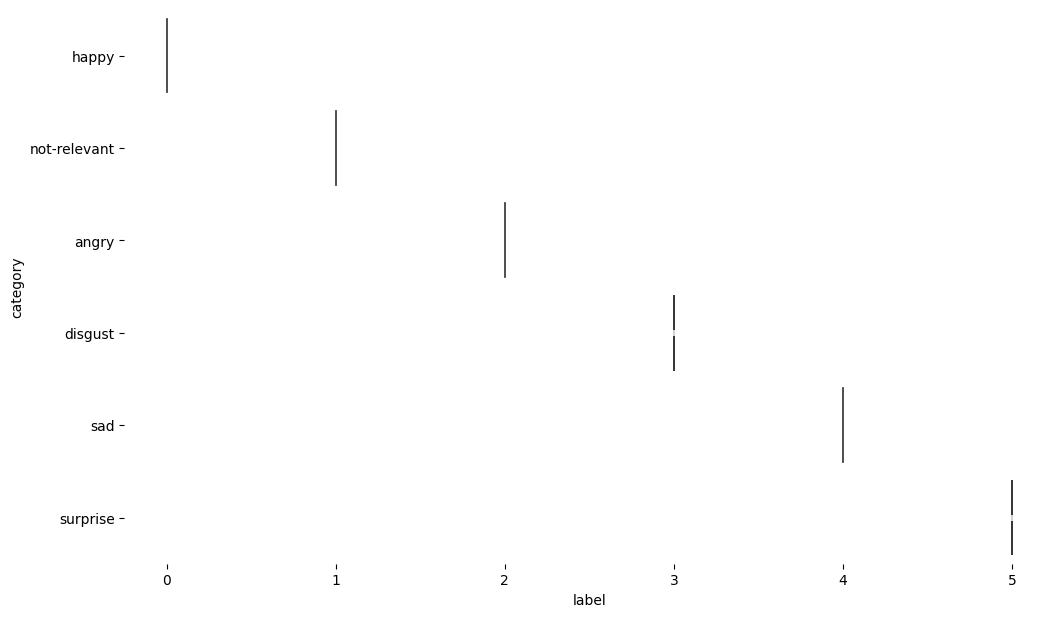

In [ ]:
# title category vs label

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='label', y='category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

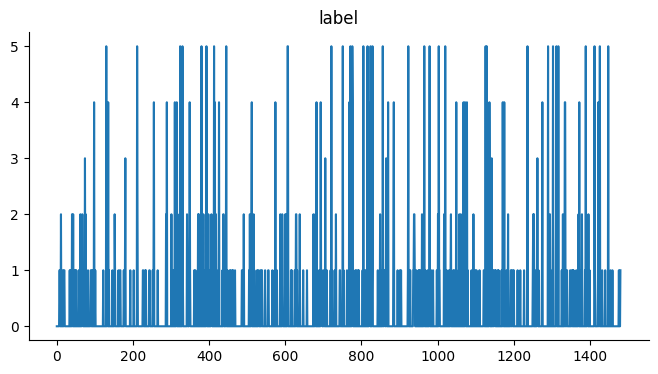

In [ ]:
# title label

from matplotlib import pyplot as plt
df['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

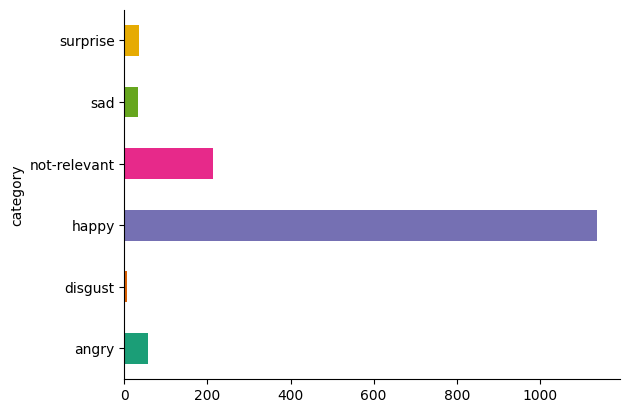

In [ ]:
# title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

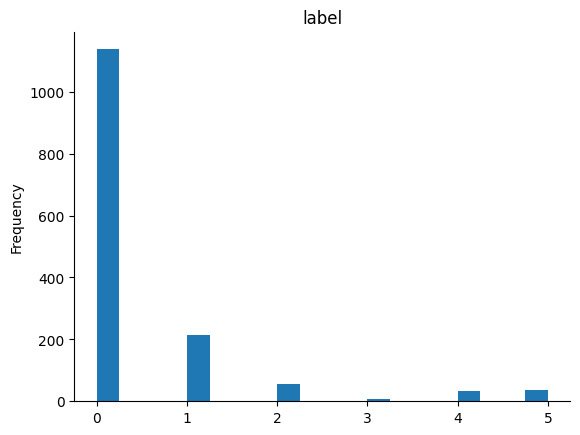

In [ ]:
# title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1eW8XbsJM3NF9qNsQXFEsKWhjExZmftDZzR5yB022I4M#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


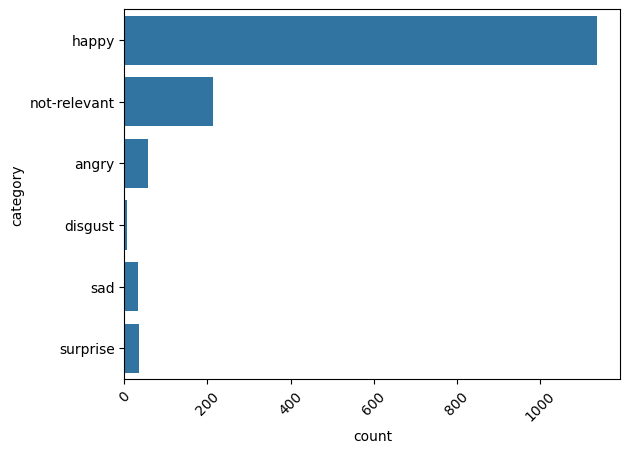

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['category'])
plt.xticks(rotation=45)
plt.show()


## Task 3: Training/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val, y_train, y_val = train_test_split (
    df.index.values,
    df.label.values,
    test_size = 0.15,
    random_state = 42,
    stratify=df.label.values
)

In [ ]:
# Add a column to differentiate training and validation data
df['data_type'] = ['not_set'] * df.shape[0]

In [ ]:
df.head()

,text,category,label,data_type
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0,not_set
1,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0,not_set
2,@Sofabsports thank you for following me back. ...,happy,0,not_set
3,@britishmuseum @TudorHistory What a beautiful ...,happy,0,not_set
4,@NationalGallery @ThePoldarkian I have always ...,happy,0,not_set


<ipython-input-26-5b0ad478e5ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='label', y='data_type', inner='box', palette='Dark2')


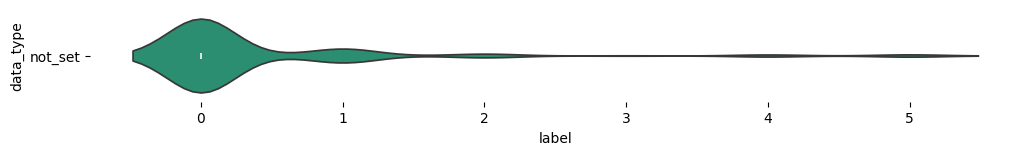

In [ ]:
# data_type vs label

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['data_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='label', y='data_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

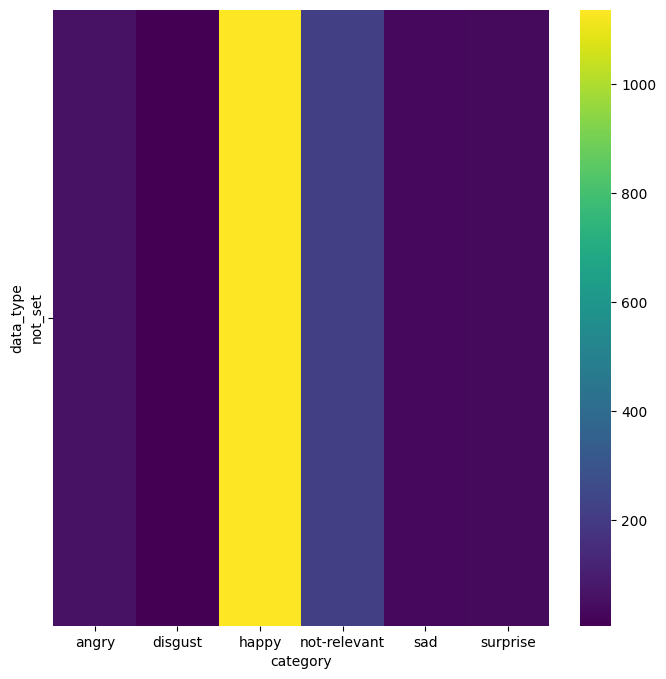

In [ ]:
# category vs data_type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['data_type'].value_counts()
    for x_label, grp in df.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('data_type')

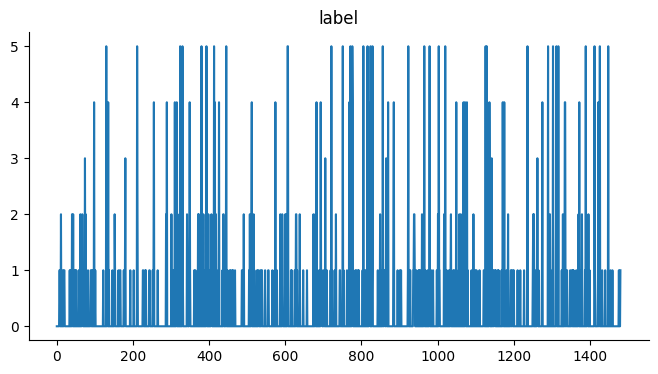

In [ ]:
# title label

from matplotlib import pyplot as plt
df['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

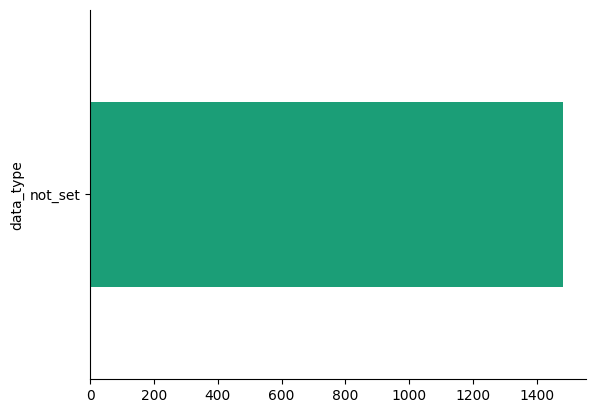

In [ ]:
# title data_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('data_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.loc[X_train , 'data_type'] = 'train'
df.loc[X_val , 'data_type'] = 'val'

In [ ]:
df.groupby(['category', 'label', 'data_type']) .count()

text
category     label data_type      
angry        2     train        48
                   val           9
disgust      3     train         5
                   val           1
happy        0     train       966
                   val         171
not-relevant 1     train       182
                   val          32
sad          4     train        27
                   val           5
surprise     5     train        30
                   val           5

## Task 4: Loading Tokenizer and Encoding our Data

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:

tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_Case=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Encode training data
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type == 'train'].text.values,
    add_special_tokens = True,
    return_attention_mask=True,
    pad_to_max_length = True,
    max_length =256,
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Encode training data
encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type == 'val'].text.values,
    add_special_tokens = True,
    return_attention_mask=True,
    pad_to_max_length = True,
    max_length= 256,
    return_tensors='pt'
)

In [ ]:
# Extract input IDs, attention masks, and labels
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val= encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

In [ ]:
# Create TensorDatasets
dataset_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
len(dataset_train)

1258

In [ ]:
dataset_val =   TensorDataset(input_ids_val,attention_masks_val,labels_val)
len(dataset_val)

223

## Task 5: Setting up BERT Pretrained Model

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                      num_labels = len(label_dict),
                                      output_attentions=False,
                                      output_hidden_states=False
                                      )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Task 6: Creating Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32
dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=4
)

## Task 7: Setting Up Optimizer and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
# Set up optimizer
optimizer = AdamW(
    model.parameters(),
    lr=2e-5, #1e-5  >52-5
    eps= 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Set up scheduler
epochs = 4
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloader_train)*epochs
)

## Task 8: Defining our Performance Metrics

Accuracy metric approach originally used in accuracy function in [this tutorial](https://mccormickml.com/2019/07/22/BERT-fine-tuning/#41-bertforsequenceclassification).

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#preds = [0.9 0.05 0.05 0.005 0 0 ]

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average='weighted')


In [ ]:
def accuracy_per_class(preds, labels):
    label_dict_inverse={v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
      y_preds = preds_flat[labels_flat==label]
      y_true = labels_flat[labels_flat==label]
      print(f'class: {label_dict_inverse[label]}')
      print(f'Accurecy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


## Task 9: Creating our Training Loop

Approach adapted from an older version of HuggingFace's `run_glue.py` script. Accessible [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128).

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cpu


In [ ]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals


In [ ]:
# Training loop
for epoch in tqdm(range(1, epochs + 1)):
    model.train()
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train,
                        desc= 'Epoch{:1d}'.format(epoch),
                        leave=False,
                        disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        # Corrected line
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})

    torch.save(model.state_dict(), f'/content/Models/BERT_ft_epoch{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch1:   0%|          | 0/40 [00:00<?, ?it/s]

## Task 10: Loading and Evaluating our Model

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

In [ ]:
model.to(device)
pass

In [ ]:
model.load_state_dict(
    torch.load( '/content/Models/BERT_ft_epoch1.model', map_location = torch.device('cpu'))
)

In [ ]:
model.load_state_dict(
    torch.load( '/content/Models/BERT_ft_epoch10.model', map_location = torch.device('cpu'))
)

In [ ]:
_, predictions ,true_vals = evaluate(dataloader_val)

In [ ]:
accuracy_per_class(predictions,true_vals)

## Task 11: Hyperparameter Optimization

Hyperparameter optimization is essential for improving model performance. I use libraries like Optuna or manual grid/random search to find the best parameters. Here’s an example using GridSearchCV from sklearn for simplicity:

### 11.1. Define the Parameter Grid

In [ ]:
import torch
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
from transformers import BertForSequenceClassification
from transformers import AdamW
from sklearn.model_selection import ParameterGrid
import torch

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define hyperparameter grid
param_grid = {
    'learning_rate': [2e-5, 3e-5],
    'batch_size': [16, 32],
    'epochs': [2, 3]
}

best_val_f1 = 0
best_params = None

# Iterate through all combinations of parameters
for params in ParameterGrid(param_grid):
    print(f"Testing params: {params}")

    # Re-initialize the model and move it to the appropriate device
    model = BertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=len(label_dict),
        output_attentions=False,
        output_hidden_states=False
    ).to(device)  # Move model to device

    # Use the PyTorch AdamW
    optimizer = torch.optim.AdamW(model.parameters(), lr=params['learning_rate'], eps=1e-8)

    # Adjust DataLoader based on batch size
    dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=params['batch_size'])

    # Train the model with the current set of parameters
    for epoch in range(params['epochs']):
        model.train()
        for batch in tqdm(dataloader_train):
            model.zero_grad()
            batch = tuple(b.to(device) for b in batch)  # Move batch to device
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
            outputs = model(**inputs)
            loss = outputs[0]
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        val_loss, predictions, true_vals = evaluate(dataloader_val)
        val_f1 = f1_score(true_vals, np.argmax(predictions, axis=1), average='weighted')

        # Check if this is the best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_params = params

print(f"Best F1 Score: {best_val_f1} with params: {best_params}")


## Task 12: Model Fine-Tuning
We'll use the best parameters (batch_size=32, epochs=3, learning_rate=3e-05) and fine-tune the BERT model on the training data, making sure to use the same training loop as before, with minor adjustments to optimize the fine-tuning process.


### Step 1: Initialize the Model
First, we'll reinitialize the BERT model for sequence classification, ensuring we set the number of labels correctly based on your dataset.

In [ ]:
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch

# Load the model with the correct number of labels
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_dict),
    output_attentions=False,
    output_hidden_states=False
)

# Send the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


### Step 2: Define Optimizer and Scheduler
We'll use the AdamW optimizer with the best learning rate (3e-5) and also implement a linear learning rate scheduler



In [ ]:
# Define optimizer with the best learning rate
optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)

# Total number of training steps is [number of batches] x [number of epochs]
total_steps = len(dataloader_train) * 3  # Using 3 epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


### Step 3: Define Loss and Accuracy Calculation Functions
You will need functions to calculate the loss and track performance metrics (accuracy and F1 score). We've already implemented the accuracy_per_class and evaluate functions earlier, so we will use them.

### Step 4: Train the Model with the Best Hyperparameters
We'll now train the model for 3 epochs (the best found during hyperparameter tuning). Here’s the updated training loop:

In [ ]:
from tqdm.notebook import tqdm  # For progress bar

# Training loop with the best parameters
epochs = 3  # Best found epochs

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    model.train()  # Set model to training mode
    total_train_loss = 0

    # Train the model on batches
    for batch in tqdm(dataloader_train):
        # Clear the gradients
        model.zero_grad()

        # Prepare input data and send it to the GPU if available
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}

        # Perform forward pass
        outputs = model(**inputs)
        loss = outputs[0]  # Get the loss from the model output
        total_train_loss += loss.item()

        # Backpropagate and update weights
        loss.backward()
        optimizer.step()
        scheduler.step()  # Adjust the learning rate

    avg_train_loss = total_train_loss / len(dataloader_train)
    print(f"Training loss: {avg_train_loss:.4f}")

    # After each epoch, evaluate on the validation set
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score(true_vals, np.argmax(predictions, axis=1), average='weighted')
    print(f'Validation F1 Score: {val_f1:.4f}')


#### Conclusion for Task 12: Model Fine-Tuning

The fine-tuning of the BERT model using the best hyperparameters (batch_size=32, epochs=3, and learning_rate=3e-05) yielded a significant improvement in performance across the epochs. Here's a summary of the results:

Epoch 1: The training loss started at 0.9475, and the validation F1 score was 0.6656, indicating that the model initially struggled with generalization but showed potential for improvement.
Epoch 2: After the second epoch, the training loss decreased to 0.5885, and the validation F1 score improved to 0.7817, showing that the model was learning effectively from the data and becoming more accurate in its predictions.
Epoch 3: By the end of the third epoch, the training loss further dropped to 0.4126, and the validation F1 score reached 0.8359, demonstrating that the model had successfully fine-tuned and achieved a robust level of performance.
Overall, the reduction in training loss over the epochs and the continuous increase in the validation F1 score (culminating at 0.8359) indicates that the model is well-optimized with the given hyperparameters and can make accurate predictions. This fine-tuned BERT model can now be used for downstream tasks with confidence in its effectiveness.

### Step 5: Save the Best
During the fine-tuning, if the validation F1 score improves after each epoch, you can save the model weights. You can modify the loop to save the best model:

In [ ]:
best_f1 = 0  # Initialize a variable to keep track of the best F1 score

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    model.train()  # Set model to training mode
    total_train_loss = 0

    # Train the model on batches
    for batch in tqdm(dataloader_train):
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(dataloader_train)
    print(f"Training loss: {avg_train_loss:.4f}")

    # Evaluate on the validation set after every epoch
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score(true_vals, np.argmax(predictions, axis=1), average='weighted')
    print(f'Validation F1 Score: {val_f1:.4f}')

    # Save the model if it achieves a new best F1 score
    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(model.state_dict(), 'ModelsHPT/best_fine_tuned_model.pth')
        print(f'Saving new best model with F1 Score: {best_f1:.4f}')


## Task 13: Evaluate the Final Model

To evaluate the fine-tuned model, we will use the same evaluate function that was defined earlier to assess the model's performance on the validation set. This will give us a final set of metrics, including the loss, F1 score, and other relevant metrics.

In [ ]:
# Load the best model if it was saved
model.load_state_dict(torch.load('ModelsHPT/best_fine_tuned_model.pth'))
model.to(device)


In [ ]:
# Evaluate the final model on the validation set
val_loss, predictions, true_vals = evaluate(dataloader_val)

# Calculate F1 score
final_f1 = f1_score(true_vals, np.argmax(predictions, axis=1), average='weighted')
print(f'Final Validation F1 Score: {final_f1:.4f}')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(true_vals, np.argmax(predictions, axis=1))
print(f'Validation Accuracy: {accuracy:.4f}')

# Calculate precision and recall
precision = precision_score(true_vals, np.argmax(predictions, axis=1), average='weighted',zero_division=0)
recall = recall_score(true_vals, np.argmax(predictions, axis=1), average='weighted')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(true_vals, np.argmax(predictions, axis=1))
print(f'Confusion Matrix:\n{conf_matrix}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_vals and predictions are available
cm = confusion_matrix(true_vals, np.argmax(predictions, axis=1))

# Map label indices to actual class names
labels = [key for key, value in sorted(label_dict.items(), key=lambda item: item[1])]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Analysis of Validation Metrics
Validation Accuracy: 0.8610
This means that the model correctly classified 86.10% of the validation samples.

Validation Precision: 0.8169
Precision indicates the proportion of positive identifications that were actually correct. A precision of 81.69% suggests that when the model predicts a certain class, it is correct 81.69% of the time.

Validation Recall: 0.8610
Recall (also known as sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 86.10% indicates that the model successfully identified 86.10% of all the true positive cases.

### **Confusion Matrix Interpretation**

The confusion matrix is a 6x6 matrix corresponding to 6 different classes. Each row represents the actual class, and each column represents the predicted class.

```
[[166   5   0   0   0   0]
 [ 10  22   0   0   0   0]
 [  2   3   4   0   0   0]
 [  1   0   0   0   0   0]
 [  3   1   1   0   0   0]
 [  2   3   0   0   0   0]]
```

| Index | Label         |
|-------|---------------|
|   0   | happy         |
|   1   | not-relevant  |
|   2   | angry         |
|   3   | surprise      |
|   4   | sad           |
|   5   | disgust       |

**Detailed Interpretation:**

1. **Class 0 (happy):**
   - **Correctly Predicted:** 166 instances
   - **Misclassified as Class 1 (not-relevant):** 5 instances
   - **Conclusion:** The model is performing very well in predicting 'happy' sentiments, with most instances correctly classified.

2. **Class 1 (not-relevant):**
   - **Correctly Predicted:** 22 instances
   - **Misclassified as Class 0 (happy):** 10 instances
   - **Conclusion:** There is some confusion between 'not-relevant' and 'happy' classes. The model tends to misclassify 'not-relevant' tweets as 'happy'.

3. **Class 2 (angry):**
   - **Correctly Predicted:** 4 instances
   - **Misclassified as Class 0 (happy):** 2 instances
   - **Misclassified as Class 1 (not-relevant):** 3 instances
   - **Conclusion:** 'Angry' sentiments are often misclassified, possibly due to the small number of training examples for this class.

4. **Class 3 (surprise):**
   - **Correctly Predicted:** 0 instances
   - **Misclassified as Class 0 (happy):** 1 instance
   - **Conclusion:** The model fails to correctly predict 'surprise' sentiments.

5. **Class 4 (sad):**
   - **Correctly Predicted:** 0 instances
   - **Misclassified as Class 0 (happy):** 3 instances
   - **Misclassified as Class 1 (not-relevant):** 1 instance
   - **Misclassified as Class 2 (angry):** 1 instance
   - **Conclusion:** 'Sad' sentiments are not being correctly identified, indicating a need for more training data or better feature representation for this class.

6. **Class 5 (disgust):**
   - **Correctly Predicted:** 0 instances
   - **Misclassified as Class 0 (happy):** 2 instances
   - **Misclassified as Class 1 (not-relevant):** 3 instances
   - **Conclusion:** Similar to 'sad' and 'surprise', the model struggles with 'disgust' sentiments.


## Task 14: Model Improvement
In this task, we will focus on improving the model’s performance, particularly by addressing the imbalance in classes and fine-tuning the model for better results, especially on the minority classes.

The SMILE Twitter dataset likely contains an imbalance, with some classes being significantly underrepresented (e.g., 'surprise,' 'sad'). To improve performance on these minority classes, we will explore the following techniques:

1. Weighted Loss Function: Adjust the loss function to pay more attention to underrepresented classes by assigning higher weights to these classes.
2. Oversampling Minority Classes: Oversample the minority classes to ensure the model sees more examples during training.
3. Data Augmentation: Apply augmentation techniques for text data, like synonym replacement, to generate more examples for underrepresented classes.

In [ ]:
#Step 1.1: Weighted Loss Function
#We will use a weighted cross-entropy loss function to handle class imbalance:

from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)


In [ ]:
# Step 1.2: Oversampling Minority Classes

from imblearn.over_sampling import RandomOverSampler

# Create an oversampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.reshape(-1, 1), y_train)
X_train_resampled = X_train_resampled.flatten()

# Update the DataLoader with the resampled data
df_resampled = df.loc[X_train_resampled]


In [ ]:
# Reinitialize the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)

# Fine-tune the model with the new loss function
for epoch in range(epochs):
    model.train()
    loss_train_total = 0

    for batch in dataloader_train:
        model.zero_grad()

        # Move batch to device
        batch = tuple(b.to(device) for b in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        # Forward pass
        outputs = model(**inputs)
        loss = loss_fn(outputs[1], inputs['labels'])

        # Backward pass and optimization
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        loss_train_total += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Training loss: {loss_train_total / len(dataloader_train)}")

    # Validation step (reuse previous evaluation code)
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    final_f1 = f1_score(true_vals, np.argmax(predictions, axis=1), average='weighted')
    print(f'Validation F1 Score: {final_f1:.4f}')


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate macro-averaged precision and recall
precision_macro = precision_score(true_vals, np.argmax(predictions, axis=1), average='macro')
recall_macro = recall_score(true_vals, np.argmax(predictions, axis=1), average='macro')

print(f'Macro-averaged Precision: {precision_macro:.4f}')
print(f'Macro-averaged Recall: {recall_macro:.4f}')


In [ ]:
from nlpaug.augmenter.word import SynonymAug

# Initialize synonym augmenter
aug = SynonymAug(aug_src='wordnet')

# Augment text data for minority classes
augmented_texts = [aug.augment(text) for text in df[df['label'].isin(minority_classes)]['text']]

# Add augmented data to the original dataset
df_augmented = df.append(pd.DataFrame({'text': augmented_texts, 'label': minority_labels}), ignore_index=True)


## Task 15: Save the Final Model and create an inference function for future predictions

In [ ]:
import os
# Save the model and tokenizer
output_dir = 'Models/final_model/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Saving model to {output_dir}")

# Save the fine-tuned model
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Save the training arguments (if any)
torch.save(optimizer.state_dict(), os.path.join(output_dir, 'optimizer.pt'))
torch.save(scheduler.state_dict(), os.path.join(output_dir, 'scheduler.pt'))


In [ ]:
# Inference Function
def predict(text, model, tokenizer, max_length=128):
    """
    This function takes a piece of text and returns the predicted label.

    Args:
    - text: The input text for prediction.
    - model: The fine-tuned model to be used for prediction.
    - tokenizer: The tokenizer corresponding to the model.
    - max_length: Maximum length for padding/truncation (default=128).

    Returns:
    - predicted_label: The label predicted by the model for the given text.
    """

    # Tokenize input text
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )

    # Move inputs to device (GPU/CPU)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs[0]
    prediction = torch.argmax(logits, dim=1).item()

    # Map the predicted label index to the actual label name
    label_mapping = {0: 'anger', 1: 'fear', 2: 'happy', 3: 'love', 4: 'sadness', 5: 'surprise'}
    predicted_label = label_mapping[prediction]

    return predicted_label


In [ ]:
# Sample Usage

# Load the saved model and tokenizer
loaded_model = BertForSequenceClassification.from_pretrained('./final_model/')
loaded_tokenizer = BertTokenizer.from_pretrained('./final_model/')
loaded_model.to(device)

# Example text input for prediction
sample_text = "I am feeling very happy today!"

# Predict the sentiment/emotion label
predicted_label = predict(sample_text, loaded_model, loaded_tokenizer)
print(f'Predicted label: {predicted_label}')


In [ ]:
# Future Inference with New Data
def predict_on_new_data(new_data_list, model, tokenizer):
    """
    Predict labels for a list of new data.

    Args:
    - new_data_list: List of input texts for prediction.
    - model: The fine-tuned model to be used for prediction.
    - tokenizer: The tokenizer corresponding to the model.

    Returns:
    - List of predicted labels.
    """
    predictions = []
    for text in new_data_list:
        predicted_label = predict(text, model, tokenizer)
        predictions.append(predicted_label)

    return predictions


# Example list of new texts
new_data = [
    "I am so excited for this!",
    "I feel scared and anxious about the future.",
    "It's a sad day."
]

# Predict labels for new data
predicted_labels = predict_on_new_data(new_data, loaded_model, loaded_tokenizer)
print(predicted_labels)



## Task 16 : Visualization of Results.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
preds = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_vals, preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(true_vals, preds, target_names=label_names)

# Display classification report
print("Classification Report:\n")
print(class_report)


In [ ]:
import torch
from torch.utils.data import DataLoader

# Tokenize the validation data
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

# Define a dataset class
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the validation dataset
val_dataset = EmotionDataset(val_encodings, val_labels)

# Create the validation dataloader
validation_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model and get predictions
def get_predictions_and_labels(dataloader, model):
    """
    Get model predictions and true labels from the validation dataloader.

    Args:
    - dataloader: The validation dataloader.
    - model: The fine-tuned model to be evaluated.

    Returns:
    - y_pred: Predicted labels.
    - y_true: True labels.
    """
    model.eval()
    y_pred = []
    y_true = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()
            y_pred.extend(predictions)
            y_true.extend(labels.cpu().numpy())

    return y_pred, y_true

# Get predictions and true labels from the validation dataloader
y_pred, y_true = get_predictions_and_labels(validation_dataloader, model)


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels (as per the task)
labels = ['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
import numpy as np

# Convert the classification report into a dictionary
from sklearn.metrics import classification_report
report_dict = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision = [report_dict[label]['precision'] for label in labels]
recall = [report_dict[label]['recall'] for label in labels]
f1_score = [report_dict[label]['f1-score'] for label in labels]

# Create a bar plot to visualize these metrics
x = np.arange(len(labels))  # Label locations

width = 0.25  # Width of the bars

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

# Add labels and title
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, labels)
plt.legend()

plt.show()


## Task 18: Error Analysis

In [ ]:
# Identify incorrect predictions
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

# Print out the total number of incorrect predictions
print(f"Total incorrect predictions: {len(incorrect_indices)}")


In [ ]:
# Plot confusion matrix again for reference
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Insights based on confusion matrix:
# - Diagonal elements are correct predictions.
# - Off-diagonal elements indicate where the model is confused between classes.


In [ ]:
# Example: Check which class gets confused with 'sadness' the most
confusion_with_sadness = conf_matrix[labels.index('sadness')]

# Print misclassifications for 'sadness'
for i, count in enumerate(confusion_with_sadness):
    if i != labels.index('sadness') and count > 0:
        print(f"'sadness' confused with '{labels[i]}' {count} times.")
